In [3]:
data_dir="./qwen0.6b-gsm8k-grpo/checkpoint-9/trainer_state.json"

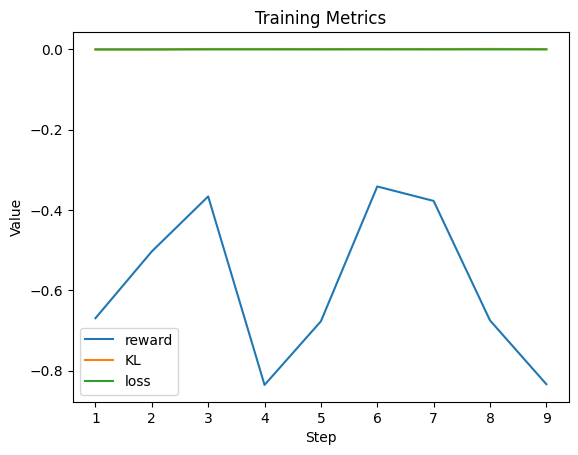

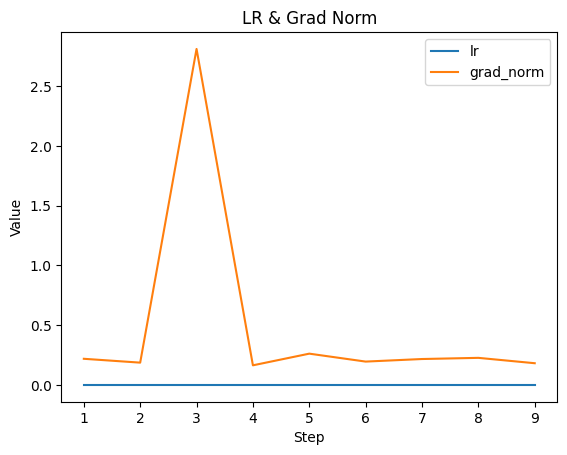

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取 Trainer state
with open(data_dir, "r") as f:
    state = json.load(f)

# 2. 转为 DataFrame
df = pd.DataFrame(state["log_history"])
df = df.set_index("step")  # 或者用 "epoch"

# 3. 绘制 reward / kl / loss 曲线
plt.figure()
plt.plot(df.index, df["reward"], label="reward")
plt.plot(df.index, df["kl"],    label="KL")
if "loss" in df:
    plt.plot(df.index, df["loss"], label="loss")
plt.xlabel("Step")
plt.ylabel("Value")
plt.title("Training Metrics")
plt.legend()
plt.show()

# 4. 绘制学习率和梯度范数
plt.figure()
plt.plot(df.index, df["learning_rate"], label="lr")
plt.plot(df.index, df["grad_norm"],     label="grad_norm")
plt.xlabel("Step")
plt.ylabel("Value")
plt.title("LR & Grad Norm")
plt.legend()
plt.show()
